In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
b_voltage_arr, b_current_arr, b_voltage_error, b_current_error = np.loadtxt('Battery_VI.txt', skiprows=1, unpack=True)
ps6_voltage_arr, ps6_current_arr, ps6_voltage_error, ps6_current_error = np.loadtxt('power_supply_6.txt', skiprows=1, unpack=True)
ps10_voltage_arr, ps10_current_arr, ps10_voltage_error, ps10_current_error = np.loadtxt('power_supply_10.txt', skiprows=1, unpack=True)
ps15_voltage_arr, ps15_current_arr, ps15_voltage_error, ps15_current_error = np.loadtxt('power_supply_15.txt', skiprows=1, unpack=True)
ps20_voltage_arr, ps20_current_arr, ps20_voltage_error, ps20_current_error = np.loadtxt('power_supply_20.txt', skiprows=1, unpack=True)

#changing from mA to A
b_current_arr = b_current_arr * 0.001
ps6_current_arr = ps6_current_arr * 0.001
ps10_current_arr = ps10_current_arr * 0.001
ps15_current_arr = ps15_current_arr * 0.001
ps20_current_arr = ps20_current_arr * 0.001

b_current_error = b_current_error * 0.001
ps6_current_error = ps6_current_error * 0.001
ps10_current_error = ps10_current_error * 0.001
ps15_current_error = ps15_current_error * 0.001
ps20_current_error = ps20_current_error * 0.001

In [3]:
def model_function(x, a, b):
    return a * x + b

In [4]:
# calculations for the battery
b_popt, b_pcov = curve_fit(model_function, b_current_arr, b_voltage_arr,\
                                       sigma=b_voltage_error, absolute_sigma=True)
b_a = b_popt[0]
b_b = b_popt[1]
b_pvar = np.diag(b_pcov)
b_stdev = np.sqrt(b_pvar)

# Subtract the resistance of the ammeter
b_resis = b_a * (-1) - 1.3
u_b_resis = np.sqrt((b_stdev[0]/b_a)**2 + (0.1/1.3)**2)

# Calculate uncertainties for the current
print('The resistance given by the slope for the battery (with resistance from the ammeter subtracted) is',\
      b_resis, '±', u_b_resis, 'ohms')

# Get points for the fitted curve
b_x = np.linspace(0, 0.03, 10)
b_y = model_function(b_x, b_a, b_b)

The resistance given by the slope for the battery (with resistance from the ammeter subtracted) is 0.41614853430912113 ± 0.5550963779751689 ohms


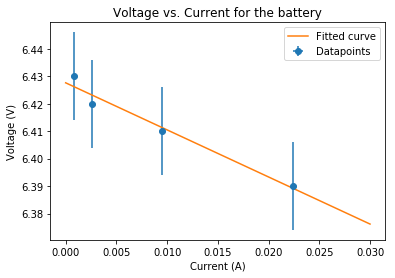

In [5]:
plt.errorbar(b_current_arr, b_voltage_arr, xerr=b_current_error, yerr=b_voltage_error, marker='o',fmt='.', label='Datapoints')
plt.plot(b_x, b_y, label='Fitted curve')
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs. Current for the battery')
plt.legend()

In [6]:
upper_n = 4
lower_n = 2
degrees_of_freedom = upper_n - lower_n

chi_squared_b = (1 / degrees_of_freedom) * sum(((b_voltage_arr[: degrees_of_freedom] - b_y[: degrees_of_freedom])\
                                            / b_voltage_error[: degrees_of_freedom])**2)

print("The chi squared value we got for the battery is,", str(chi_squared_b),\
      ". Which we think is neither too small nor too big. These values would be decreased if we were to take more datapoints to increase the degrees of freedom (assuming that the extra datapoints all lie nicely along the fitted line).\n")

The chi squared value we got for the battery is, 3.0529913931707595 . Which we think is neither too small nor too big. These values would be decreased if we were to take more datapoints to increase the degrees of freedom (assuming that the extra datapoints all lie nicely along the fitted line).



In [7]:
# calculations for the 6V power supply
ps6_popt, ps6_pcov = curve_fit(model_function, ps6_current_arr, ps6_voltage_arr,\
                                       sigma=ps6_voltage_error, absolute_sigma=True)
ps6_a = ps6_popt[0]
ps6_b = ps6_popt[1]
ps6_pvar = np.diag(ps6_pcov)
ps6_stdev = np.sqrt(ps6_pvar)

# Subtract the resistance of the ammeter
ps6_resis = ps6_a * (-1) - 1.3
u_ps6_resis = np.sqrt((ps6_stdev[0])**2 + (0.1)**2)

# Calculate uncertainties for the current
print('The resistance given by the slope for the power supply (with resistance from the ammeter subtracted) is',\
      ps6_resis, '±', u_ps6_resis, 'ohms')

# Get points for the fitted curve
ps6_x = np.linspace(0, 0.03, 10)
ps6_y = model_function(ps6_x, ps6_a, ps6_b)

The resistance given by the slope for the power supply (with resistance from the ammeter subtracted) is -0.319540552170149 ± 0.968976730473821 ohms


In [8]:
# calculations for the 10V power supply
ps10_popt, ps10_pcov = curve_fit(model_function, ps10_current_arr, ps10_voltage_arr,\
                                       sigma=ps10_voltage_error, absolute_sigma=True)
ps10_a = ps10_popt[0]
ps10_b = ps10_popt[1]
ps10_pvar = np.diag(ps10_pcov)
ps10_stdev = np.sqrt(ps10_pvar)

# Subtract the resistance of the ammeter
ps10_resis = ps10_a * (-1) - 1.3
u_ps10_resis = np.sqrt((ps10_stdev[0])**2 + (0.1)**2)

# Calculate uncertainties for the current
print('The resistance given by the slope for the power supply (with resistance from the ammeter subtracted) is',\
      ps10_resis, '±', u_ps10_resis, 'ohms')

# Get points for the fitted curve
ps10_x = np.linspace(0, 0.04, 10)
ps10_y = model_function(ps10_x, ps10_a, ps10_b)

The resistance given by the slope for the power supply (with resistance from the ammeter subtracted) is 0.7216034387451413 ± 0.9517613492291662 ohms


In [9]:
# calculations for the 15V power supply
ps15_popt, ps15_pcov = curve_fit(model_function, ps15_current_arr, ps15_voltage_arr,\
                                       sigma=ps15_voltage_error, absolute_sigma=True)
ps15_a = ps15_popt[0]
ps15_b = ps15_popt[1]
ps15_pvar = np.diag(ps15_pcov)
ps15_stdev = np.sqrt(ps15_pvar)

# Subtract the resistance of the ammeter
ps15_resis = ps15_a * (-1) - 1.3
u_ps15_resis = np.sqrt((ps15_stdev[0])**2 + (0.1)**2)

# Calculate uncertainties for the current
print('The resistance given by the slope for the power supply (with resistance from the ammeter subtracted) is',\
      ps15_resis, '±', u_ps15_resis, 'ohms')

# Get points for the fitted curve
ps15_x = np.linspace(0, 0.06, 10)
ps15_y = model_function(ps15_x, ps15_a, ps15_b)

The resistance given by the slope for the power supply (with resistance from the ammeter subtracted) is 0.7694119576807787 ± 0.9585578485951939 ohms


In [10]:
# calculations for the 20V power supply
ps20_popt, ps20_pcov = curve_fit(model_function, ps20_current_arr, ps20_voltage_arr,\
                                       sigma=ps20_voltage_error, absolute_sigma=True)
ps20_a = ps20_popt[0]
ps20_b = ps20_popt[1]
ps20_pvar = np.diag(ps20_pcov)
ps20_stdev = np.sqrt(ps20_pvar)

# Subtract the resistance of the ammeter
ps20_resis = ps20_a * (-1) - 1.3
u_ps20_resis = np.sqrt((ps20_stdev[0])**2 + (0.1)**2)

# Calculate uncertainties for the current
print('The resistance given by the slope for the power supply (with resistance from the ammeter subtracted) is',\
      ps20_resis, '±', u_ps20_resis, 'ohms')

# Get points for the fitted curve
ps20_x = np.linspace(0, 0.075, 10)
ps20_y = model_function(ps20_x, ps20_a, ps20_b)

The resistance given by the slope for the power supply (with resistance from the ammeter subtracted) is 1.0679000626144088 ± 0.9478905372048548 ohms


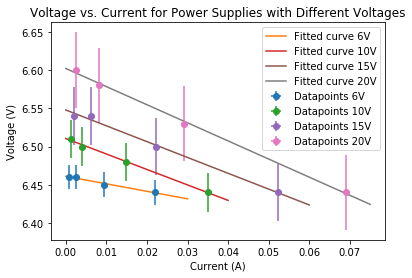

In [11]:
plt.errorbar(ps6_current_arr, ps6_voltage_arr, xerr=ps6_current_error, yerr=ps6_voltage_error, \
             marker='o',fmt='.', label='Datapoints 6V')
plt.plot(ps6_x, ps6_y, label='Fitted curve 6V')

# subtract a certain offset so that we can see the slop on the same plot
plt.errorbar(ps10_current_arr, ps10_voltage_arr - (ps10_voltage_arr[0] - ps6_voltage_arr[0]), \
             xerr=ps10_current_error, yerr=ps10_voltage_error, marker='o',fmt='.', label='Datapoints 10V')
plt.plot(ps10_x, ps10_y - (ps10_voltage_arr[0] - ps6_voltage_arr[0]), label='Fitted curve 10V')

plt.errorbar(ps15_current_arr, ps15_voltage_arr - (ps15_voltage_arr[0] - ps6_voltage_arr[0]), \
             xerr=ps15_current_error, yerr=ps15_voltage_error, marker='o',fmt='.', label='Datapoints 15V')
plt.plot(ps15_x, ps15_y - (ps15_voltage_arr[0] - ps6_voltage_arr[0]), label='Fitted curve 15V')

plt.errorbar(ps20_current_arr, ps20_voltage_arr - (ps20_voltage_arr[0] - ps6_voltage_arr[0]), \
             xerr=ps20_current_error, yerr=ps20_voltage_error, marker='o',fmt='.', label='Datapoints 20V')
plt.plot(ps20_x, ps20_y - (ps20_voltage_arr[0] - ps6_voltage_arr[0]), label='Fitted curve 20V')

plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs. Current for Power Supplies with Different Voltages')
plt.legend()

In [12]:
chi_squared_ps6 = (1 / degrees_of_freedom) * sum(((ps6_voltage_arr[: degrees_of_freedom] - ps6_y[: degrees_of_freedom])\
                                            / ps6_voltage_error[: degrees_of_freedom])**2)
chi_squared_ps10 = (1 / degrees_of_freedom) * sum(((ps10_voltage_arr[: degrees_of_freedom] - ps10_y[: degrees_of_freedom])\
                                            / ps10_voltage_error[: degrees_of_freedom])**2)
chi_squared_ps15 = (1 / degrees_of_freedom) * sum(((ps15_voltage_arr[: degrees_of_freedom] - ps15_y[: degrees_of_freedom])\
                                            / ps15_voltage_error[: degrees_of_freedom])**2)
chi_squared_ps20 = (1 / degrees_of_freedom) * sum(((ps20_voltage_arr[: degrees_of_freedom] - ps20_y[: degrees_of_freedom])\
                                            / ps20_voltage_error[: degrees_of_freedom])**2)

print("The chi squared value we got for the power supply when it is on for 6V is,", str(chi_squared_ps6),
      "\nFor the power supply when it is on for 10V is,", str(chi_squared_ps10),
      "\nWhen it is on for 15V is,", str(chi_squared_ps15),
      "\nWhen it is on for 20V is,", str(chi_squared_ps20),
      "\nWe think all of these values are neither too small nor too big (all less than 10). These values would be decreased if we were to take more datapoints to increase the degrees of freedom (assuming that the extra datapoints all lie nicely along the fitted line).\n")

The chi squared value we got for the power supply when it is on for 6V is, 0.9716137510411477 
For the power supply when it is on for 10V is, 4.3359649347930125 
When it is on for 15V is, 4.538063415574651 
When it is on for 20V is, 6.0311138436990195 
We think all of these values are neither too small nor too big (all less than 10). These values would be decreased if we were to take more datapoints to increase the degrees of freedom (assuming that the extra datapoints all lie nicely along the fitted line).



In [13]:
# Taking average of the resistance given by the 4 different voltages
ps_resis = (ps6_resis + ps10_resis + ps15_resis + ps20_resis) / 4
u_ps_resis = np.sqrt((u_ps6_resis)**2 + (u_ps10_resis)**2 +\
                     (u_ps15_resis)**2 + (u_ps20_resis)**2) / 4 
print('The calculated average resistance for the power supply is',\
      ps_resis, '±', u_ps_resis, 'ohms')

The calculated average resistance for the power supply is 0.5598437267175449 ± 0.47841503880732406 ohms


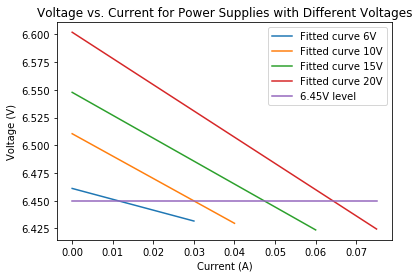

In [14]:
plt.plot(ps6_x, ps6_y, label='Fitted curve 6V')

# subtract a certain offset so that we can see the slop on the same plot
plt.plot(ps10_x, ps10_y - (ps10_voltage_arr[0] - ps6_voltage_arr[0]), label='Fitted curve 10V')

plt.plot(ps15_x, ps15_y - (ps15_voltage_arr[0] - ps6_voltage_arr[0]), label='Fitted curve 15V')

plt.plot(ps20_x, ps20_y - (ps20_voltage_arr[0] - ps6_voltage_arr[0]), label='Fitted curve 20V')

plt.plot(ps20_x, np.array([6.45] * 10), label='6.45V level')

plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs. Current for Power Supplies with Different Voltages')
plt.legend()

In [15]:
fixed_level = 6.45 # in volt

#solve for the current at the 6.45 voltage point for the four different lines
def solve_for_current(y, a, b):
    # y = ax + b, solve for x
    # x = (y - b) / a
    return (y - b) / a

#remember there was an offset for each of the line except for the 6V fit, so the graph above does not accurately depict
#the distance between the lines
i_ps6 = solve_for_current(fixed_level, ps6_a, ps6_b)
i_ps10 = solve_for_current(fixed_level, ps10_a, ps10_b)
i_ps15 = solve_for_current(fixed_level, ps15_a, ps15_b)
i_ps20 = solve_for_current(fixed_level, ps20_a, ps20_b)

print('The corresponding current for the 6.45 voltage point when the power supply is on for 6V is', i_ps6,
     'A\nWhen the power supply is on for 10V is', i_ps10,
     'A\nWhen the power supply is on for 15V is', i_ps15,
     'A\nWhen the power supply is on for 20V is', i_ps20, 'A')

The corresponding current for the 6.45 voltage point when the power supply is on for 6V is 0.011274344992509303 A
When the power supply is on for 10V is 1.7908795155222625 A
When the power supply is on for 15V is 4.183692708486078 A
When the power supply is on for 20V is 5.621869187085 A


Text(0,0.5,'Current (A)')

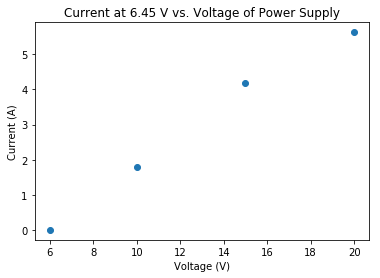

In [16]:
#Plot the retionship between the i_max and supply voltage

plt.errorbar(np.array([6, 10, 15, 20]), np.array([i_ps6, i_ps10, i_ps15, i_ps20]), marker='o',fmt='.')
plt.title('Current at 6.45 V vs. Voltage of Power Supply')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (A)')